 # Machine Learning LAB 1
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. Complete **all** the required code sections and answer to **all** the questions.

### IMPORTANT 1: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!


### IMPORTANT 2: Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb . Notebooks without name will be discarded.

**Student name**: Golnaz Tajbakhsh<br>
**ID Number**:2016508


# 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed, you can use your ID (matricola) or any other number! Try to make various tests changing the seed.

In [4]:
IDnumber = 1234567 #YOUR_ID , try also to change the seed to see the impact of random initialization on the results
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [6]:
# Load the dataset
filename = 'music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) #columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceptron classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


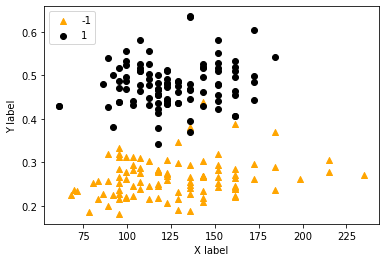

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
def plot_scatter(X,y):
    colors = ["orange","black"]
    markers = ('^', 'o')
    
    for i, yi in enumerate(np.unique(y)):
        Xi = X[y==yi]
        plt.scatter(Xi[:,0], Xi[:,1],
                        color=colors[i], marker=markers[i], label=yi)
    
    plt.xlabel('X label')
    plt.ylabel('Y label')
    plt.legend(loc='upper left')
#Generate the Scatterplot
plot_scatter(X,Y)

We are going to classify class "1" (metal) vs class "-1" (classical)

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [8]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.


from sklearn.model_selection import train_test_split



#X_training = instances for training set
#Y_training = labels for the training set
#X_test = instances for test set
#Y_test = labels for the test set

X_training, X_test, Y_training, Y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

#m_training needs to be the number of samples in the training set
m_training = X_training.shape[0]

#m_test needs to be the number of samples in the test set
m_test = X_test.shape[0]

print(Y_training) #to make sure that Y_training contains both 1 and -1
print(m_test)

print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("Shape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

[-1 -1  1 -1 -1  1 -1  1  1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1  1 -1  1  1
  1 -1 -1  1 -1  1  1 -1  1  1  1 -1 -1  1  1 -1  1 -1 -1  1 -1  1 -1 -1
  1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1  1  1  1  1  1  1  1 -1 -1 -1  1  1
 -1  1 -1 -1 -1  1 -1  1 -1  1  1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1 -1 -1
  1 -1 -1  1  1  1 -1  1  1 -1  1  1  1 -1  1  1 -1  1 -1  1  1 -1  1  1
  1  1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1  1 -1 -1]
60

Number of classical instances in test: 28
Number of metal instances in test: 32
Shape of training set: (140, 3)
Shape of test set: (60, 3)


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [9]:
# Add a 1 to each sample (homogeneous coordinates)
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

print("Training set in homogeneous coordinates:")
print(X_training[:10])

Training set in homogeneous coordinates:
[[1.00000000e+00 1.51999081e+02 2.66903700e-01 1.21387231e+03]
 [1.00000000e+00 1.12347147e+02 3.03159348e-01 8.22263434e+02]
 [1.00000000e+00 9.22851562e+01 5.02055322e-01 2.74339281e+03]
 [1.00000000e+00 9.57031250e+01 3.33862600e-01 1.52490676e+03]
 [1.00000000e+00 1.61499023e+02 2.39078871e-01 1.15788986e+03]
 [1.00000000e+00 1.23046875e+02 5.10222321e-01 3.11423161e+03]
 [1.00000000e+00 1.23046875e+02 2.74433506e-01 8.76875613e+02]
 [1.00000000e+00 1.17453835e+02 4.69570902e-01 2.76031930e+03]
 [1.00000000e+00 1.35999178e+02 4.46210875e-01 2.56680363e+03]
 [1.00000000e+00 7.17773438e+01 2.34236042e-01 1.52664707e+03]]


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [10]:
# A template is provided, but feel free to build a different implementation

def perceptron_update(new_w, x, predict, y):
    eta = 0.2
    new_w += eta*np.dot(np.transpose(x), y - predict)
    return new_w

def  perceptron (x, w_, y):
    #representing predict function with 'prc [[]]' variable
    prc = [[0]] * len(x)
    for i in range(0, len(x)):    
        for j in range(0,len(w_)):
            prc[i] += x[i][j] * w_[j]
        prc[i] = np.where(prc[i]>0, 1, -1)
        #checking values with target
        if(y[i] != prc[i]):
            w_ = perceptron_update(w_, x, prc[i], y)
            
    return w_,prc

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [11]:
#now run the perceptron for 100 iterations
w=np.random.rand(X_training.shape[1])*0.1 - 0.5
# print(w)
# w = np.zeros(len(X_training[0]))
# print(curr_w)
iterations = 100
permutation = np.random.permutation(X_training.shape[0]) # random permurtation
X_training = X_training[permutation]
Y_training = Y_training[permutation]
for temp in range(0, iterations):
    print("\nIteration ",temp+1,"\n")
    w_ ,prc= perceptron(X_training, w, Y_training)
    print("\nTrained Weights\n", w_)

miscl=[]
error_r=0
for label, predict_ in zip(Y_training, prc):
            if label != predict_: 
                miscl.append(error_r)
                
            error_r +=1
            
print("misclassified indexes are:",miscl)

error = len(miscl)/m_training
print("Training Error of perpceptron (100 iterations): " + str(error))


Iteration  1 


Trained Weights
 [-6.72400324e+02 -8.79103425e+04 -3.49437668e+01 -1.18739141e+04]

Iteration  2 


Trained Weights
 [-1.31400032e+03 -1.71849193e+05 -6.73534369e+01 -2.01082230e+04]

Iteration  3 


Trained Weights
 [-1.83400032e+03 -2.39903711e+05 -9.14975550e+01 -1.37860932e+04]

Iteration  4 


Trained Weights
 [-2.35560032e+03 -3.08231280e+05 -1.10149434e+02  2.66295339e+04]

Iteration  5 


Trained Weights
 [-2.81320032e+03 -3.68070580e+05 -1.35653015e+02  6.13638590e+03]

Iteration  6 


Trained Weights
 [-3.24200032e+03 -4.24211848e+05 -1.53597969e+02  2.33758448e+04]

Iteration  7 


Trained Weights
 [-3.67080032e+03 -4.80353116e+05 -1.71542923e+02  4.06153037e+04]

Iteration  8 


Trained Weights
 [-4.00680032e+03 -5.24308083e+05 -1.88780953e+02  3.46785944e+04]

Iteration  9 


Trained Weights
 [-4.40360032e+03 -5.76205216e+05 -2.10151758e+02  2.14636658e+04]

Iteration  10 


Trained Weights
 [-4.71080032e+03 -6.16462151e+05 -2.19831160e+02  5.32595634e+04]

**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [12]:
#now use the w_found to make predictions on test dataset

num_errors = 0

w_test = w_
# print(w)
# w = np.zeros(len(X_training[0]))
# print(curr_w)
t_iterations = 100
permutation = np.random.permutation(X_test.shape[0]) # random permurtation
X_test = X_test[permutation]
Y_test = Y_test[permutation]
for temp in range(0, t_iterations):
    print("\nIteration ",temp+1,"\n")
    weights_t ,prc_t= perceptron(X_test, w_test, Y_test)
    print("\nTest Weights\n", weights_t)

miscl_t=[]
for label, predict_t in zip(Y_test, prc_t):
            if label != predict_t: 
                miscl_t.append(num_errors)    
            num_errors +=1
            
print("misclassified indexes are:",miscl_t)


true_loss_estimate = len(miscl_t)/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))


Iteration  1 


Test Weights
 [-2.62772003e+04 -3.43839104e+06 -1.23376643e+03  2.23737675e+05]

Iteration  2 


Test Weights
 [-2.63060003e+04 -3.44189223e+06 -1.23331165e+03  2.21958128e+05]

Iteration  3 


Test Weights
 [-2.63348003e+04 -3.44539342e+06 -1.23285687e+03  2.20178582e+05]

Iteration  4 


Test Weights
 [-2.63524003e+04 -3.44751136e+06 -1.22941927e+03  2.34826083e+05]

Iteration  5 


Test Weights
 [-2.63812003e+04 -3.45101255e+06 -1.22896450e+03  2.33046537e+05]

Iteration  6 


Test Weights
 [-2.64100003e+04 -3.45451374e+06 -1.22850972e+03  2.31266991e+05]

Iteration  7 


Test Weights
 [-2.64484003e+04 -3.45918200e+06 -1.22790335e+03  2.28894262e+05]

Iteration  8 


Test Weights
 [-2.64868003e+04 -3.46385025e+06 -1.22729698e+03  2.26521534e+05]

Iteration  9 


Test Weights
 [-2.65156003e+04 -3.46735145e+06 -1.22684220e+03  2.24741988e+05]

Iteration  10 


Test Weights
 [-2.65444003e+04 -3.47085264e+06 -1.22638742e+03  2.22962441e+05]

Iteration  11 


Test Weight

**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1**

For 100 iterations,the test error is a bit more than training error because in this step we do not know anything about the test set, but by increasing the number of iterations the training error should decrease. 

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 4000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [14]:
#now run the perceptron for 4000 iterations here!

w=np.random.rand(X_training.shape[1])*0.1 - 0.5
# print(w)
# w = np.zeros(len(X_training[0]))
# print(curr_w)
iterations = 4000
permutation = np.random.permutation(X_training.shape[0]) # random permurtation
X_training = X_training[permutation]
Y_training = Y_training[permutation]
for temp in range(0, iterations):
#     print("\nIteration ",temp+1,"\n")
    w_ ,prc= perceptron(X_training, w, Y_training)

miscl=[]
error_r=0
for label, predict_ in zip(Y_training, prc):
            if label != predict_: 
                miscl.append(error_r)
                
            error_r +=1
            
print("misclassified indexes of training are:",miscl)

error = len(miscl)/m_training

print("Training Error of perpceptron (4000 iterations): " + str(error))


num_errors = 0

w_test = w_
# print(w)
# w = np.zeros(len(X_training[0]))
# print(curr_w)
t_iterations = 4000
permutation = np.random.permutation(X_test.shape[0]) # random permurtation
X_test = X_test[permutation]
Y_test = Y_test[permutation]
for temp in range(0, t_iterations):
#     print("\nIteration ",temp+1,"\n")
    weights_t ,prc_t= perceptron(X_test, w_test, Y_test)
#     print("\nTest Weights\n", weights_t)
miscl_t=[]
for label, predict_t in zip(Y_test, prc_t):
            if label != predict_t: 
                miscl_t.append(num_errors)    
            num_errors +=1
            
print("misclassified indexes of test are:",miscl_t)


true_loss_estimate = len(miscl_t)/m_test  # error rate on the test set

print("Test Error of perpceptron (4000 iterations): " + str(true_loss_estimate))

misclassified indexes of training are: [18, 20, 23, 36, 41, 49, 50, 57, 76, 79, 90, 101, 107, 111, 114]
Training Error of perpceptron (4000 iterations): 0.10714285714285714
misclassified indexes of test are: [0, 2, 7, 29, 38, 43, 47, 53, 59]
Test Error of perpceptron (4000 iterations): 0.15


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2**
For 4000 iterations,the test error has not changed and we reached to the best error but training error decreased. So when the number of iterationds increases we see the decrease in training error but the test error remain the same because of overfitting.

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [15]:
# Load the dataset
filename = 'music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) # columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceprton classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [16]:
#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
#IMPORTANT: do not change the random seed.

X_training, X_test, Y_training, Y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

#m_training needs to be the number of samples in the training set
m_training = X_training.shape[0]

#m_test needs to be the number of samples in the test set
m_test = X_test.shape[0]

print(Y_training) #to make sure that Y_training contains both 1 and -1
# print(m_test)


print("Number of samples in the test set:", m_test)
print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print("Number of metal instances in test:", np.sum(Y_test==1))

print("\nShape of training set: " + str(X_training.shape))
print("Shape of test set: " + str(X_test.shape))

[-1 -1 -1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1
 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1
  1  1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1
  1 -1 -1 -1 -1  1  1  1  1  1 -1 -1  1  1  1  1 -1 -1  1  1  1 -1  1 -1
  1  1  1 -1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1 -1 -1  1 -1  1  1  1  1
  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1 -1  1  1 -1  1  1]
Number of samples in the test set: 60

Number of classical instances in test: 39
Number of metal instances in test: 21

Shape of training set: (140, 3)
Shape of test set: (60, 3)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [17]:
#part on logistic regression for 2 classes
logreg = linear_model.LogisticRegression(C=1e5) #a large C disables regularization

#learn from training set
# print(X_training)

clf = logreg.fit(X_training, Y_training)

#predict on training set

predictions = clf.predict(X_training)



score = logreg.score(X_test, Y_test)
print("score on the test set:",score)

#print the error rate = fraction of misclassified samples
error_rate_training = 0
misclassifiedIndexes = []
for label, predict in zip(Y_training, predictions):
    if label != predict: 
        misclassifiedIndexes.append(error_rate_training)
#         print(error_rate_training)
    error_rate_training +=1

print("Error rate on training set: "+str(len(misclassifiedIndexes)/m_training))

#predict on test set

test_predictions = clf.predict(X_test)
# print(test_predictions)
# print(Y_test)
#print the error rate = fraction of misclassified samples
error_rate_test = 0
test_misclassifiedIndexes = []
for label, predict in zip(Y_test, test_predictions):
    if label != predict: 
        test_misclassifiedIndexes.append(error_rate_test)
#         print(error_rate_test)
    error_rate_test +=1

print("Error rate on test set: " + str(len(test_misclassifiedIndexes)/m_test))

score on the test set: 1.0
Error rate on training set: 0.007142857142857143
Error rate on test set: 0.0


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [71]:
# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['tempo', 'chroma_stft', 'spectral_centroid']
index_feature1 =0 # Select the best 2 features according to your experiments
index_feature2 =1 # Select the best 2 features according to your experiments
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]
print(X_reduced)

X_red_training, X_red_test, Y_red_training, Y_red_test = train_test_split( X_reduced, Y, test_size=0.3, random_state=42)


[[1.12347147e+02 5.27123255e-01]
 [1.07666016e+02 5.09240208e-01]
 [1.23046875e+02 2.58572289e-01]
 [1.43554688e+02 2.67353394e-01]
 [1.43554688e+02 4.29968281e-01]
 [1.29199219e+02 4.84545951e-01]
 [1.43554688e+02 4.96368499e-01]
 [1.23046875e+02 4.45083082e-01]
 [2.34907670e+02 2.70478239e-01]
 [6.98374155e+01 2.36665804e-01]
 [1.23046875e+02 3.05244371e-01]
 [1.12347147e+02 3.03159348e-01]
 [1.17453835e+02 5.01569949e-01]
 [1.12347147e+02 5.02429195e-01]
 [9.57031250e+01 4.38488566e-01]
 [1.43554688e+02 2.69064543e-01]
 [1.72265625e+02 2.60483112e-01]
 [1.17453835e+02 4.69570902e-01]
 [1.51999081e+02 4.22520490e-01]
 [1.35999178e+02 3.81394246e-01]
 [1.23046875e+02 4.33959730e-01]
 [7.17773438e+01 2.34236042e-01]
 [1.17453835e+02 2.82797433e-01]
 [1.35999178e+02 2.93142443e-01]
 [9.93840144e+01 5.33625514e-01]
 [1.23046875e+02 2.07163261e-01]
 [1.07666016e+02 4.77058001e-01]
 [9.22851562e+01 5.02055322e-01]
 [1.51999081e+02 2.43056368e-01]
 [1.61499023e+02 4.97086151e-01]
 [1.845703

Now learn a model using the training data and measure the performances.

In [72]:
# learning from training data

clf2 = logreg.fit(X_red_training, Y_red_training)

#predict on training set

predictions2 = clf2.predict(X_red_training)


score2 = logreg.score(X_red_test, Y_red_test)
print("score on the test set:",score2)

#print the error rate = fraction of misclassified samples
error_rate_training2 = 0
misclassifiedIndexes2 = []
for label, predict in zip(Y_red_training, predictions2):
    if label != predict: 
        misclassifiedIndexes2.append(error_rate_training2)
#         print(error_rate_training)
    error_rate_training2 +=1

print("Error rate on training set: "+str(len(misclassifiedIndexes2)/(X_red_training.shape[0])))

#predict on test set

test_predictions2 = clf2.predict(X_red_test)
# print(test_predictions)
# print(Y_test)

#print the error rate = fraction of misclassified samples
error_rate_test2 = 0
test_misclassifiedIndexes2 = []
for label, predict in zip(Y_red_test, test_predictions2):
    if label != predict: 
        test_misclassifiedIndexes2.append(error_rate_test2)
#         print(error_rate_test)
    error_rate_test2 +=1

print("Error rate on test set: " + str(len(test_misclassifiedIndexes2)/(X_red_test.shape[0])))


score on the test set: 0.9833333333333333
Error rate on training set: 0.02142857142857143
Error rate on test set: 0.016666666666666666


**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3**
I selected "tempo" and "chroma_stft" because it seems that they have correlation with each other

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

In [73]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

<ipython-input-73-2ef61150b86e>:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


<ipython-input-73-2ef61150b86e>:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


# 2) Linear Regression on the Boston House Price dataset

### Dataset description: 

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [79]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd

In [81]:
#Import Data: Load the data from a .csv file

filename = "house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)
Data_pd = pd.read_csv(filename,delimiter=';')
#A quick overview of data, to inspect the data you can use the method describe()

dataDescription = stats.describe(Data)
print(dataDescription)
print ("Shape of data array: " + str(Data.shape))


#for more interesting visualization: use Panda!
Data_pd

DescribeResult(nobs=500, minmax=(array([6.3200e-03, 0.0000e+00, 4.6000e-01, 0.0000e+00, 3.8500e-01,
       3.5610e+00, 2.9000e+00, 1.1296e+00, 1.0000e+00, 1.8700e+02,
       1.2600e+01, 3.2000e-01, 1.7300e+00, 5.0000e+01]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([3.65578576e+00, 1.15000000e+01, 1.11317400e+01, 7.00000000e-02,
       5.54451400e-01, 6.28297000e+00, 6.84246000e+01, 3.81193180e+00,
       9.64200000e+00, 4.09624000e+02, 1.84286000e+01, 3.56208040e+02,
       1.26987400e+01, 2.25680000e+02]), variance=array([7.47252195e+01, 5.48905812e+02, 4.76198228e+01, 6.52304609e-02,
       1.35838329e-02, 4.97618330e-01, 7.99314163e+02, 4.46304043e+00,
       7.59617595e+01, 2.85605197e+04, 4.67663531e+00, 8.41657137e+03,
       5.13361942e+01, 8.52982926e+03]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
495  0.17899   0.0   9.69     0  0.585  5.670  28.8  2.7986    6  391   
496  0.28960   0.0   9.69     0  0.585  5.390  72.9  2.7986    6  391   
497  0.26838   0.0   9.69     0  0.585  5.794  70.6  2.8927    6  391   
498  0.23912   0.0   9.69     0  0.585  6.019  65.3  2.4091    6  391   
499  0.17783   0.0   9.69     0  0.585  5.569  73.5  2.3999    6  391   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98   240  
1       17.8  396.90   9.14   216  
2       17.8  392.83   4.03   347  
3       18.7  394.63   2.94   334  
4       18.7  396.90   5.33   362  
..       ...     ...    ...   ...  
495     19.2  393.29  17.60   231  
496     19.2  396.90  21.14   197  
497     19.2  396.90  14.10   183  
498     19.2  396.90  12.92   212  
499     19.2  395.77  15.10   175  

[500 rows x 14 columns]

# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. For instance one can take $m_t=0.7m$ of the data as training and $m_{test}=0.3m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training and test sets (70%-30%)

In [82]:
#get number of total samples
num_total_samples = Data.shape[0]

print ("Total number of samples: ", num_total_samples)

m_t = int(num_total_samples*.7)
X1 = Data_pd[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
# print(X1.shape)
X1 = np.array(X1)
# print(X1)
Y1 = Data_pd['MEDV']
Y1 = np.array(Y1)
# print(Y1)
print ("Cardinality of Training Set: ", m_t)

#shuffle the data
np.random.shuffle(X1)

X_training1, X_test1, Y_training1, Y_test1 = train_test_split(X1, Y1, test_size=0.2, random_state=1)

X_training1, X_validation1, Y_training1, Y_validation1 = train_test_split(X_training1, Y_training1, test_size=0.25, random_state=1)


print ("Training input data size: ", X_training1.shape)
print ("Training output data size: ", Y_training1.shape)

print ("Validation input data size: ", X_validation1.shape)
print ("Validation output data size: ", Y_validation1.shape)

# #test data, to be used to estimate the true loss of the final model(s)
print ("Test input data size: ", X_test1.shape)
print ("Test output data size: ", Y_test1.shape)

Total number of samples:  500
Cardinality of Training Set:  350
Training input data size:  (300, 13)
Training output data size:  (300,)
Validation input data size:  (100, 13)
Validation output data size:  (100,)
Test input data size:  (100, 13)
Test output data size:  (100,)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [83]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [ 0. -0. -0.]
Std of the training input data: [1. 1. 1.]
Mean of the test input data: [ 0.15782706 -0.33313482 -0.38725417]
Std of the test input data: [1.1744617  1.02346769 0.9984556 ]


# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 
 

In [84]:
#compute linear regression coefficients for training data

#add a 1 at the beginning of each sample for training, and testing (use homogeneous coordinates)
m_training1 = X_training1.shape[0]
X_trainingH = np.hstack((np.ones((m_training1,1)),X_training1)) # H: in homogeneous coordinates
print(X_trainingH[0,:])

m_validation = X_validation1.shape[0]
X_validationH = np.hstack((np.ones((m_validation,1)),X_validation1))  # H: in homogeneous coordinates
#print X_validation[0,:]

m_test1 = X_test1.shape[0]
X_testH = np.hstack((np.ones((m_test1,1)),X_test1))  # H: in homogeneous coordinates
#print X_test[0,:]   

# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr = np.linalg.lstsq(X_trainingH,Y_training1) 
print("LS coefficients with numpy lstsq:", w_np)

# compute Residual sums of squares 
line = w_np[0]*X_trainingH+w_np[1]
RSStr_hand = np.sum(np.square(line-X_trainingH))


print("RSS with numpy lstsq: ", RSStr_np)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training1)

[  1.        0.05561  70.        2.24      0.        0.4       7.041
  10.        7.8278    5.      358.       14.8     371.58      4.74   ]
LS coefficients with numpy lstsq: [335.82290368   0.09265632   0.1426005    0.55248507  13.46514355
 -36.6241038  -15.29552858   0.29052665   2.27312611   1.43004246
  -0.14525677   0.21814363   0.03276392   0.12627955]
RSS with numpy lstsq:  [2673941.72721077]
Empirical risk with numpy lstsq: [8913.1390907]


<ipython-input-84-89f64db7b2bb>:17: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w_np, RSStr_np, rank_Xtr, sv_Xtr = np.linalg.lstsq(X_trainingH,Y_training1)


## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS). 

**TO DO**: Compute these quantities on  training and test sets.

In [86]:
#compute predictions on training and test

prediction_training = np.dot(X_trainingH, w_np)
prediction_test = np.dot(X_testH, w_np)

#what about the loss for points in the test data?
RSS_test = np.linalg.lstsq(X_testH,Y_test1)[1]

print("RSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

RSS on test data: [639113.47575373]
Loss estimated from test data: [10651.89126256]


<ipython-input-86-ab98184da194>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  RSS_test = np.linalg.lstsq(X_testH,Y_test1)[1]


### QUESTION 4: Comment on the results you get and on the difference between the train and test errors.

Insert your answer here

Test Dataset: This data set is applied on chosen prediction algorithm in orther to help us to have an overview about the performance of the chosen algorithm on real world data. The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset.

Training Dataset: This sample of data used to fit the model.The model sees and learns from this data and is used to build up our prediction algorithm and Our algorithm tries to adapt itself to the characteristics of the educational data set.

## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [87]:
from sklearn import linear_model

# build the LinearRegression() model and train it
LinReg = linear_model.LinearRegression()

LinReg.fit(X_training1,Y_training1)

print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)

# predict output values on training and test sets

pred_t = LinReg.predict(X_training1)
pred_te = LinReg.predict(X_test1)
print("predicted values for the training set:\n",pred_t)
print("predicted values for the test set:\n",pred_te)

# return a prediction score based on the coefficient of determination
print("Measure on training data:", 1-LinReg.score(X_training1, Y_training1))

Intercept: 335.82290368254934
Least-Squares Coefficients: [  0.09265632   0.1426005    0.55248507  13.46514355 -36.6241038
 -15.29552858   0.29052665   2.27312611   1.43004246  -0.14525677
   0.21814363   0.03276392   0.12627955]
predicted values for the training set:
 [216.55084011 260.49909244 231.55534543 258.70415909 225.42502076
 225.47956955 240.91158957 207.49446985 218.99951923 222.81417367
 228.98835958 198.49047666 229.19251432 274.1984402  240.78596208
 237.82003149 204.79116943 251.30108516 239.85459464 210.09937003
 239.20957696 255.31925359 228.3074597  209.30523752 237.31183248
 241.36588305 229.33054347 220.25446691 232.04996807 246.39670598
 218.21001822 248.10008464 234.69232998 234.5757387  207.64917811
 241.64798928 241.57982808 234.0422702  240.77502959 221.266838
 241.848494   242.43330203 221.333968   213.77206158 229.58074007
 208.47327797 241.86505694 227.30545078 215.26959206 209.31750778
 209.58498177 198.23429123 227.88637185 230.22790537 231.4542352
 222.31